In [1]:
import graph_tool.all as gt
import matplotlib
import matplotlib.pyplot as plt

objc[56364]: Class GNotificationCenterDelegate is implemented in both /Users/mengjunliu/anaconda3/lib/libgio-2.0.0.dylib (0x122be4b60) and /usr/local/Cellar/glib/2.70.4/lib/libgio-2.0.0.dylib (0x13521e320). One of the two will be used. Which one is undefined.


In [2]:
g = gt.Graph()
v1 = g.add_vertex()
v2 = g.add_vertex()

In [3]:
e = g.add_edge(v1, v2)

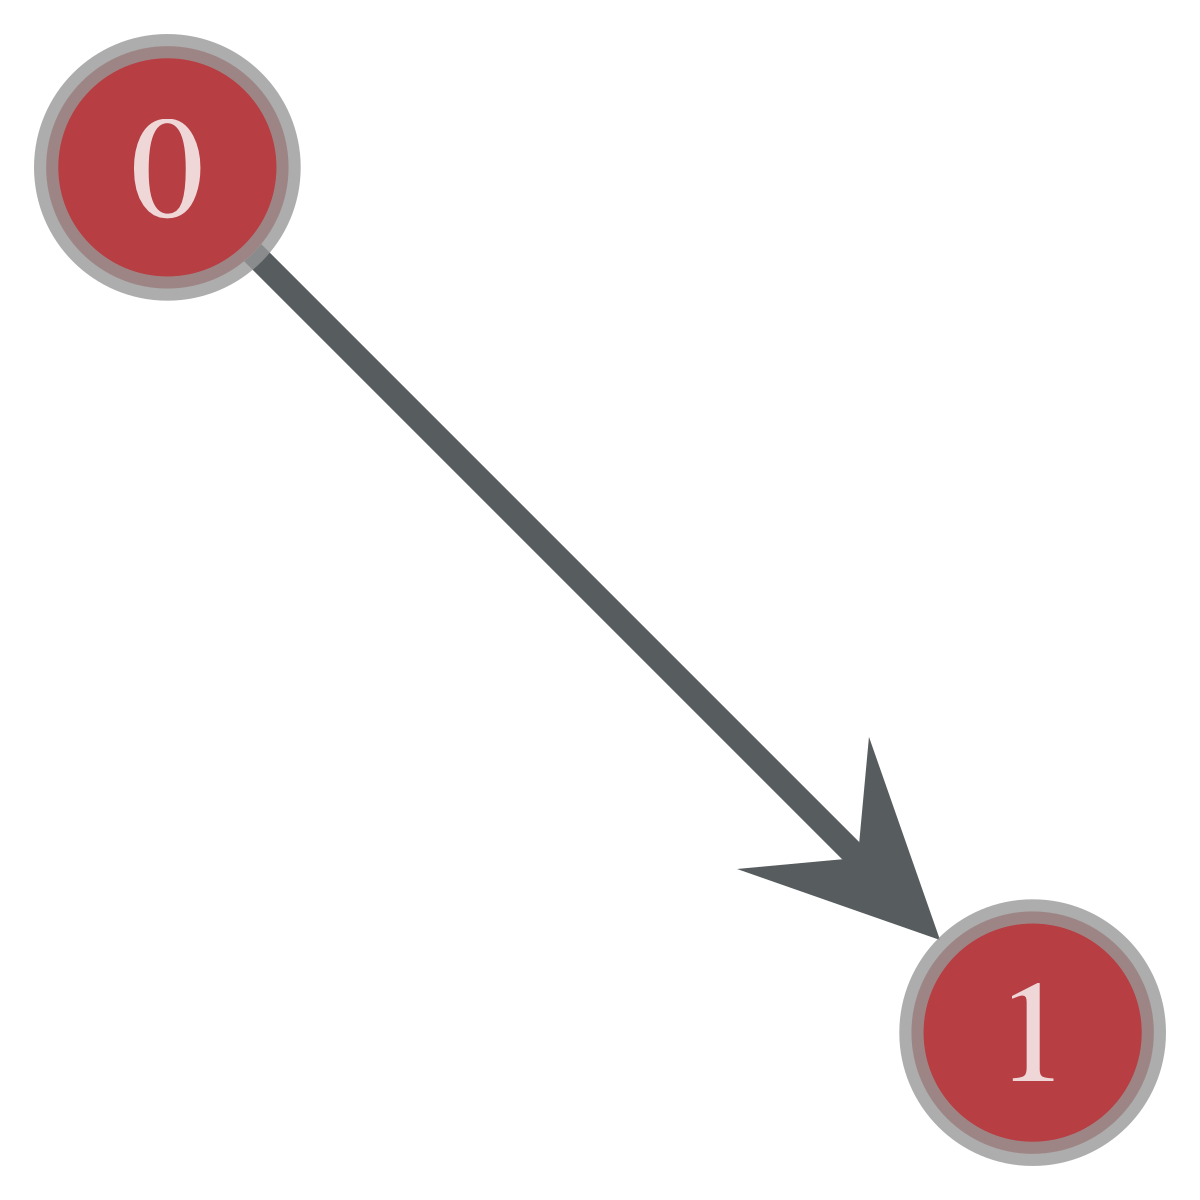

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x135698bb0, at 0x135a46190>

In [5]:
gt.graph_draw(g, vertex_text=g.vertex_index)

In [6]:
 print(e.source(), e.target())

0 1


In [7]:
vlist = g.add_vertex(10)

In [8]:
g.remove_vertex(v2)   

In [9]:
# g.remove_edge(e)

In [10]:
v = g.vertex(8)

In [11]:
g.add_edge(g.vertex(2), g.vertex(3))

<Edge object with source '2' and target '3' at 0x136f8b160>

In [12]:
e = g.add_edge(g.vertex(0), g.vertex(1))

In [13]:
for v in g.vertices():
    print(v)

0
1
2
3
4
5
6
7
8
9
10


In [14]:
g = gt.collection.data['football']

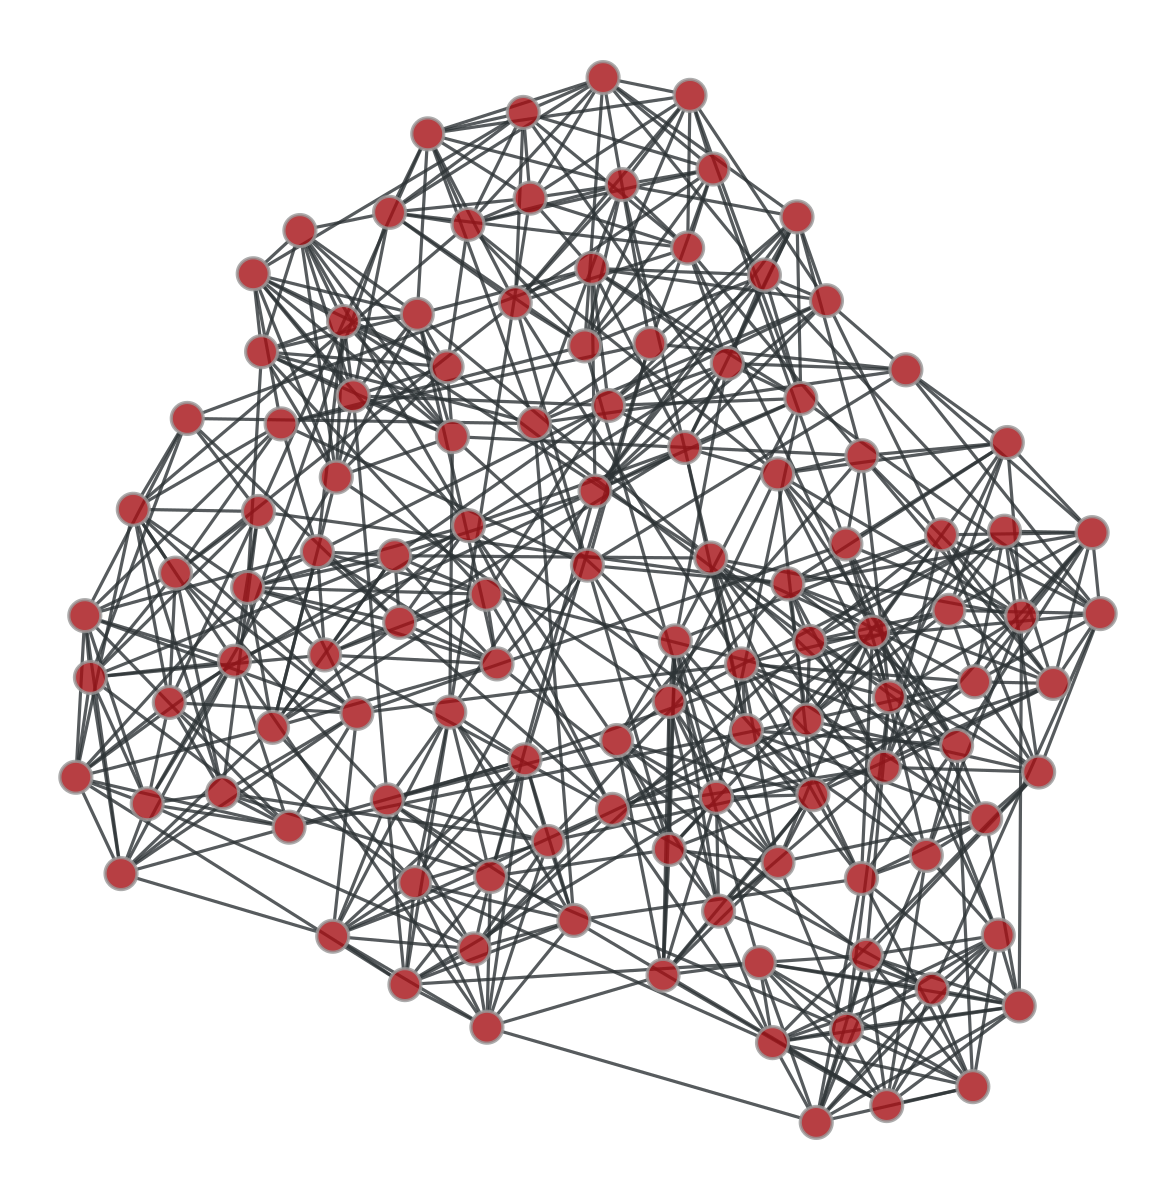

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x135a56d00, at 0x135a07100>

In [15]:
gt.graph_draw(g)

In [16]:
state = gt.minimize_blockmodel_dl(g)

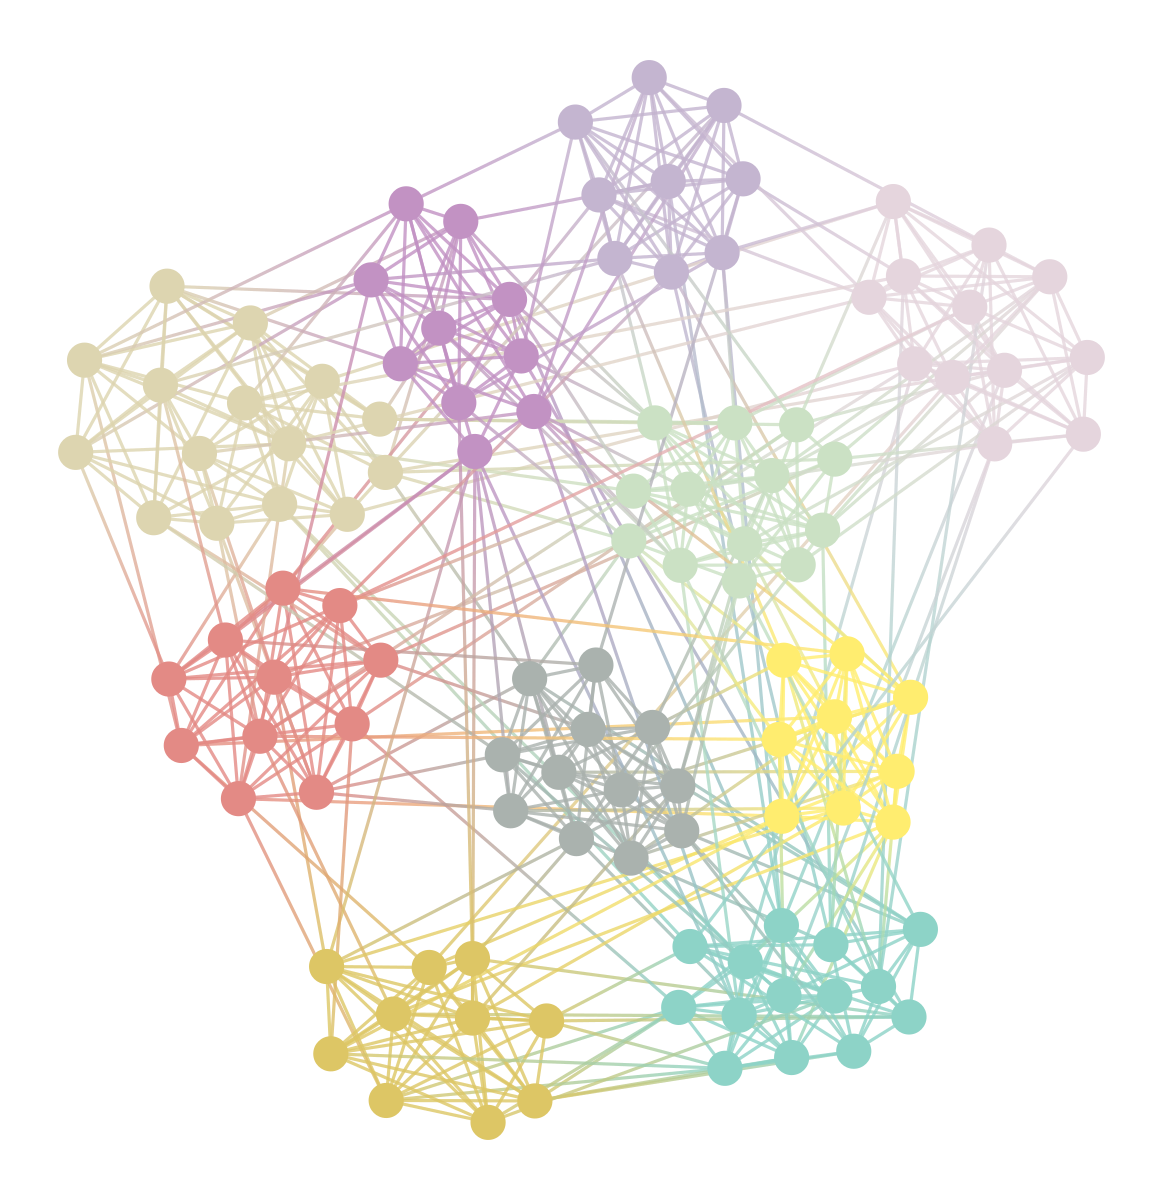

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x135a56d00, at 0x1359fc0a0>

In [17]:
state.draw(pos=g.vp.pos)

In [18]:
b = state.get_blocks()

In [19]:
b[10]

82

In [20]:
g = gt.collection.data["celegansneural"]
print(g)

<Graph object, directed, with 297 vertices and 2359 edges, 2 internal vertex properties, 1 internal edge property, 2 internal graph properties, at 0x1357f1160>


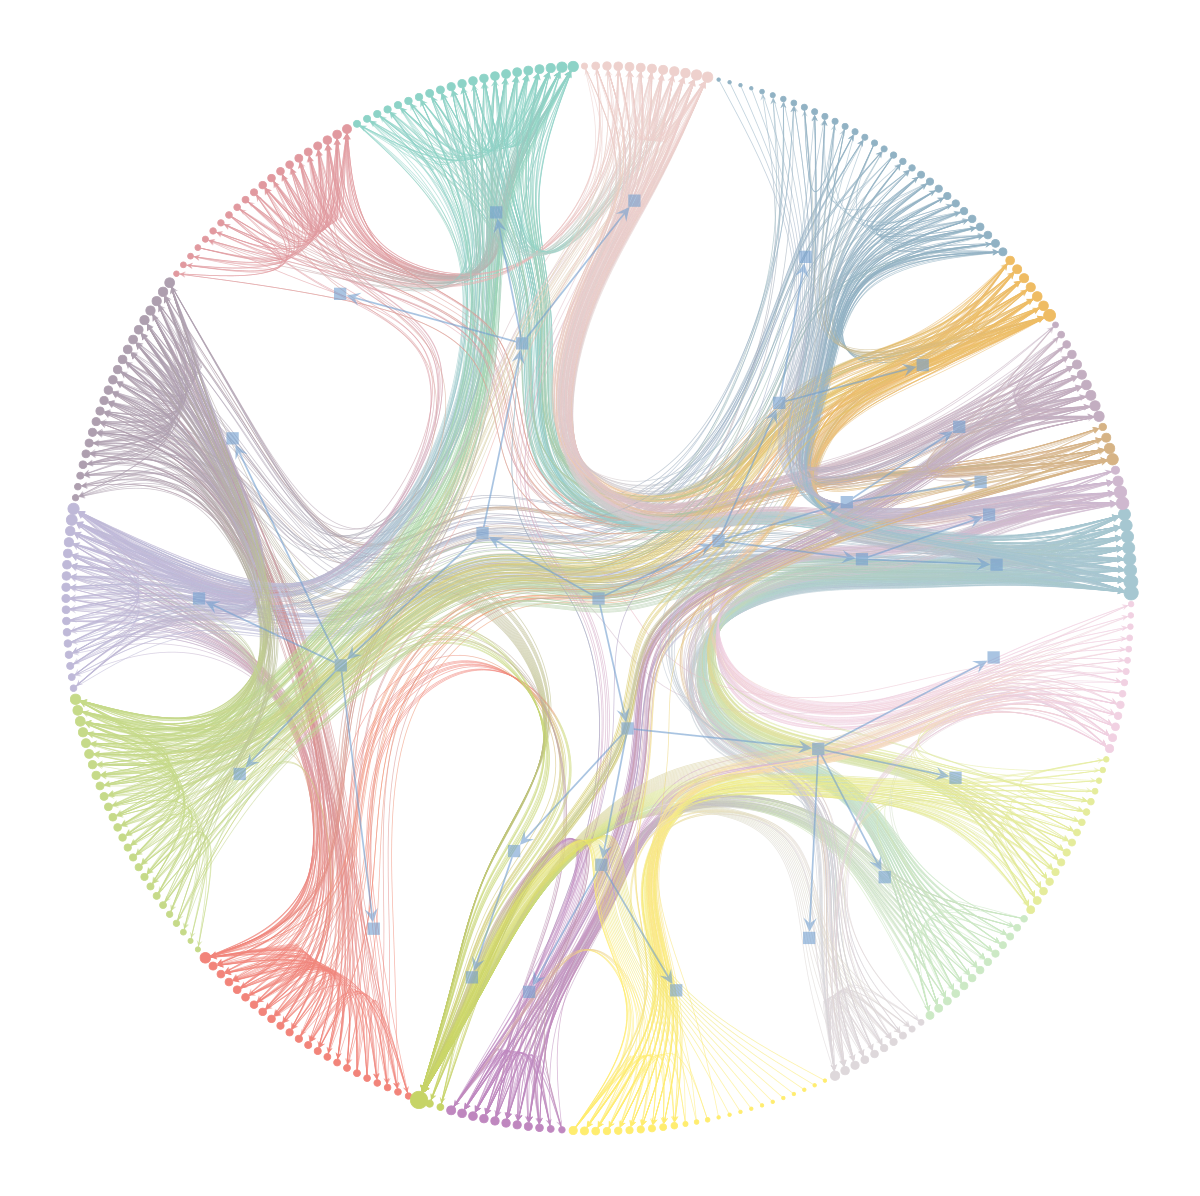

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1357f1160, at 0x135a6c0d0>,
 <GraphView object, directed, with 329 vertices and 328 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x135698d30, at 0x136f1ea90>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x135698d30, at 0x136f1ebe0>, False), at 0x135698d30>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x135698d30, at 0x136f1e880>)

In [21]:
state = gt.minimize_nested_blockmodel_dl(g)
state.draw()

In [22]:
state.print_summary()

l: 0, N: 297, B: 20
l: 1, N: 20, B: 8
l: 2, N: 8, B: 3
l: 3, N: 3, B: 1
l: 4, N: 1, B: 1


/Users/mengjunliu/anaconda3/lib/python3.9/site-packages/graph_tool/draw/cairo_draw.py:634: UserWarning: Unknown parameter: return_window
  warnings.warn("Unknown parameter: " + k, UserWarning)
/Users/mengjunliu/anaconda3/lib/python3.9/site-packages/graph_tool/draw/cairo_draw.py:634: UserWarning: Unknown parameter: main
  warnings.warn("Unknown parameter: " + k, UserWarning)


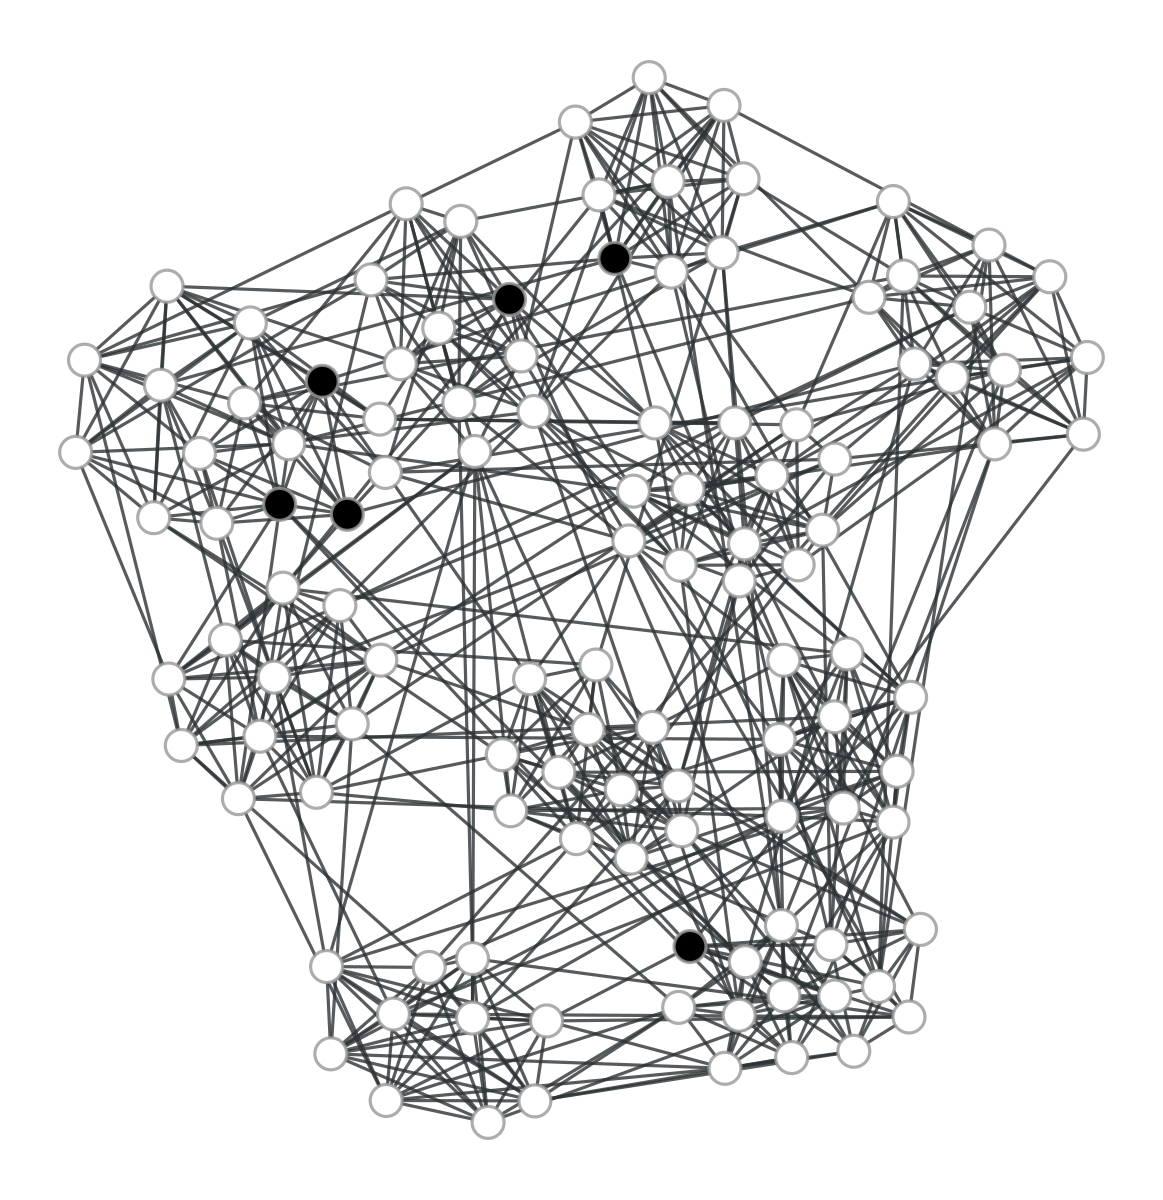

/Users/mengjunliu/anaconda3/lib/python3.9/site-packages/graph_tool/draw/cairo_draw.py:634: UserWarning: Unknown parameter: window
  warnings.warn("Unknown parameter: " + k, UserWarning)


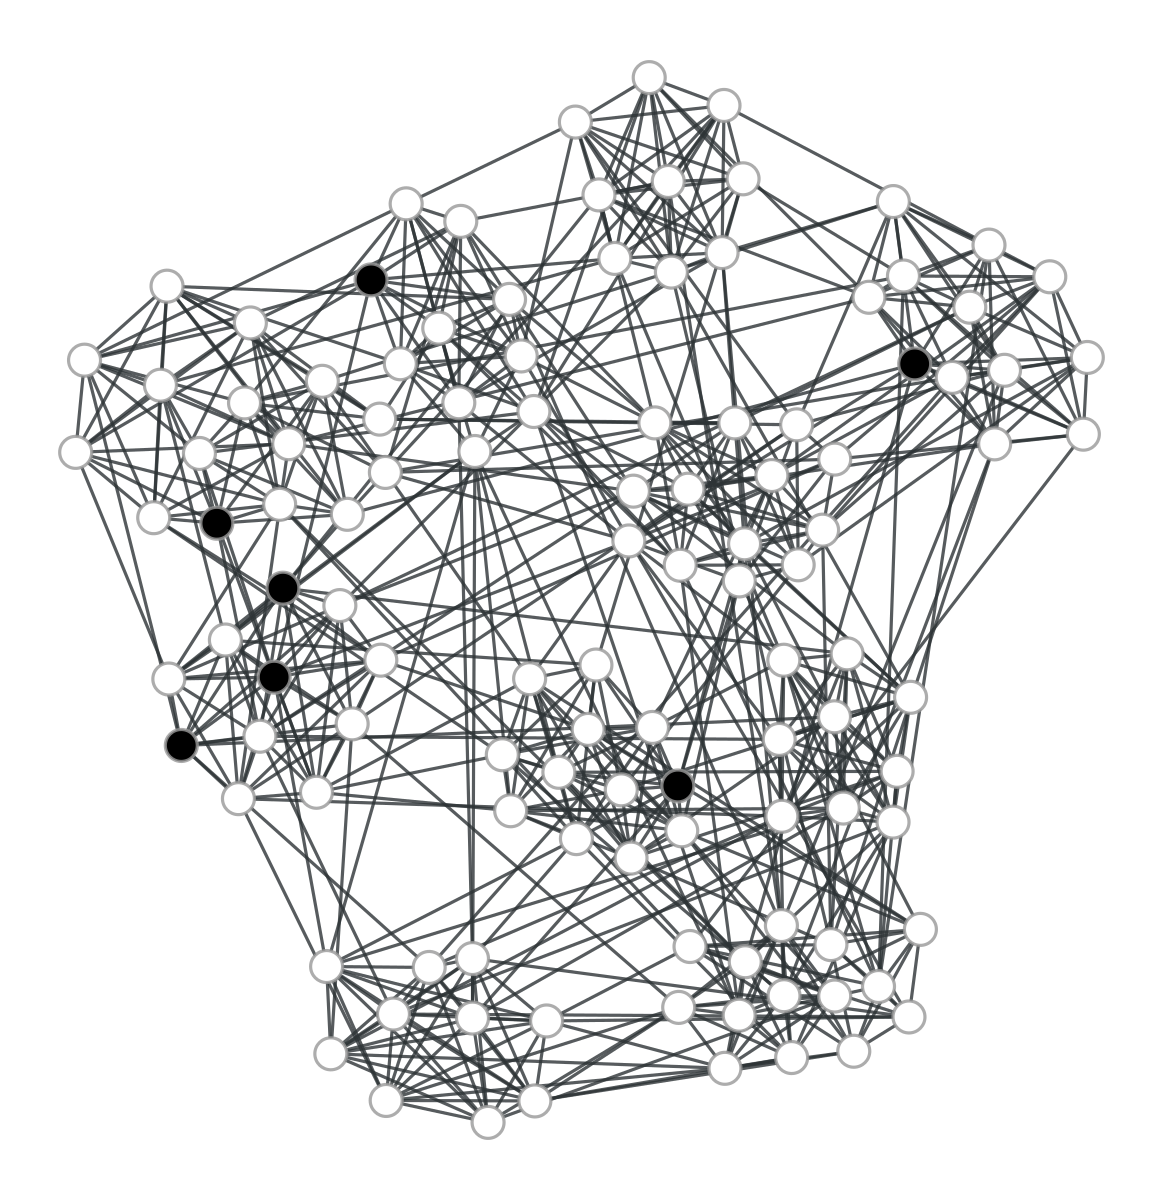

In [23]:
g = gt.collection.data["football"]
state = gt.IsingGlauberState(g, beta=1.5/10)
win = None
for i in range(2):
    ret = state.iterate_sync(niter=100)
    win = gt.graph_draw(g, g.vp.pos, vertex_fill_color=state.get_state(),
                        vcmap=matplotlib.cm.bone_r, window=win, return_window=True,
                        main=False)

In [24]:
plt.switch_backend("cairo")

fig, ax = plt.subplots(2, 2, figsize=(12, 11.5))

g = gt.collection.data["polbooks"]

gt.graph_draw(g, g.vp.pos, vertex_size=1.5, mplfig=ax[0,0])

ax[0,0].set_xlabel("$x$ coordinate")
ax[0,0].set_ylabel("$y$ coordinate")

state = gt.minimize_nested_blockmodel_dl(g)

state.draw(mplfig=ax[0,1])

ax[0,1].set_xlabel("$x$ coordinate")
ax[0,1].set_ylabel("$y$ coordinate")

g = gt.collection.data["lesmis"]
gt.graph_draw(g, g.vp.pos, vertex_size=1.5, mplfig=ax[1,0])

ax[1,0].set_xlabel("$x$ coordinate")
ax[1,0].set_ylabel("$y$ coordinate")

state = gt.minimize_nested_blockmodel_dl(g)

state.draw(mplfig=ax[1,1])

ax[1,1].set_xlabel("$x$ coordinate")
ax[1,1].set_ylabel("$y$ coordinate")

plt.subplots_adjust(left=0.08, right=0.99, top=0.99, bottom=0.06)
fig.savefig("gt-mpl.pdf")